In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/stud.csv')

In [6]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
df.shape

(1000, 8)

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.drop_duplicates()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [13]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [14]:
list1 = []

for column, dtype in df.dtypes.items():
    if dtype == 'object':
        list1.append(column)

print(list1)


['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
for i in list1:
    print("Categories in columns :  ",end = " \n")
    print(df[i].unique())

Categories in columns :   
['female' 'male']
Categories in columns :   
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in columns :   
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in columns :   
['standard' 'free/reduced']
Categories in columns :   
['none' 'completed']


In [19]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print("We have {} numeric_categories and total number is {}".format(numeric_features,len(numeric_features)))
print("We have {} numeric_categories and total number is {}".format(categorical_features,len(categorical_features)))

We have ['math_score', 'reading_score', 'writing_score'] numeric_categories and total number is 3
We have ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] numeric_categories and total number is 5


In [20]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_Score'] = (df['total_score'])/3
df['Average_Score']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average_Score, Length: 1000, dtype: float64

In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


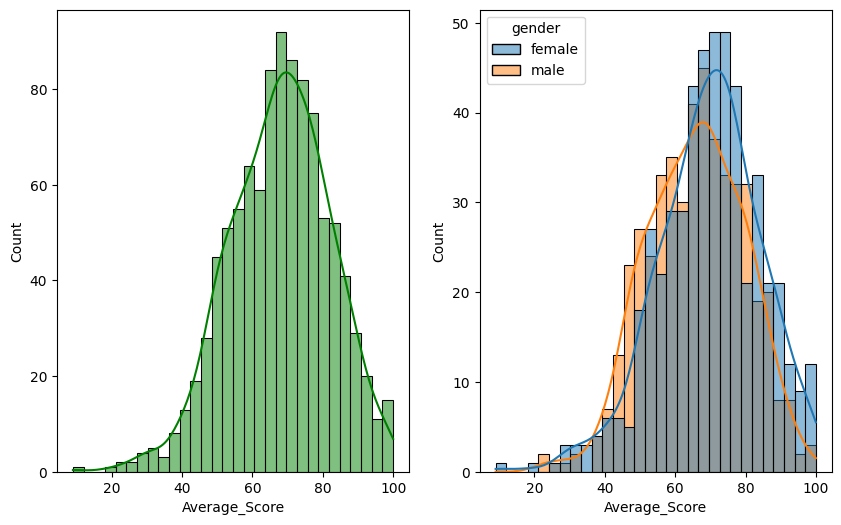

In [24]:
fig,axs = plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.histplot(data = df,x = 'Average_Score',bins = 30,kde = True,color = 'green')
plt.subplot(122)
sns.histplot(data = df,x = 'Average_Score',bins = 30,kde = True,color = 'red',hue = 'gender')
plt.show()

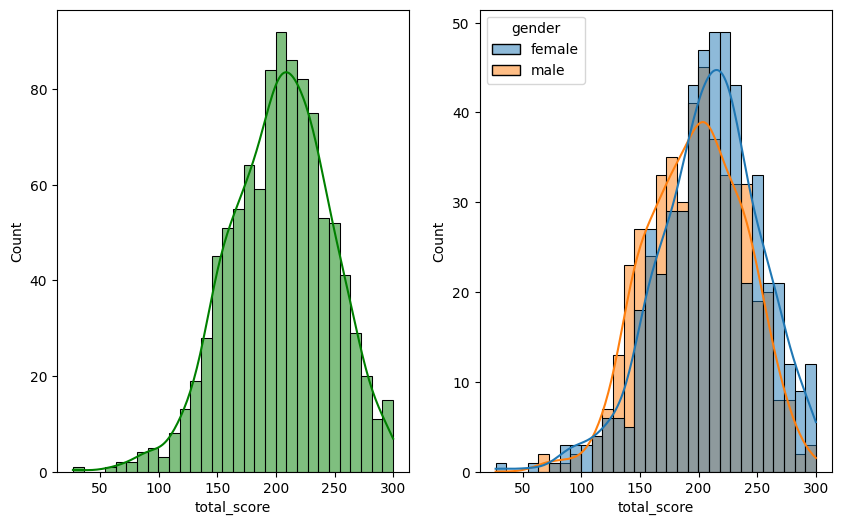

In [25]:
fig,axs = plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.histplot(data = df,x = 'total_score',bins = 30,kde = True,color = 'green')
plt.subplot(122)
sns.histplot(data = df,x = 'total_score',bins = 30,kde = True,color = 'red',hue = 'gender')
plt.show()

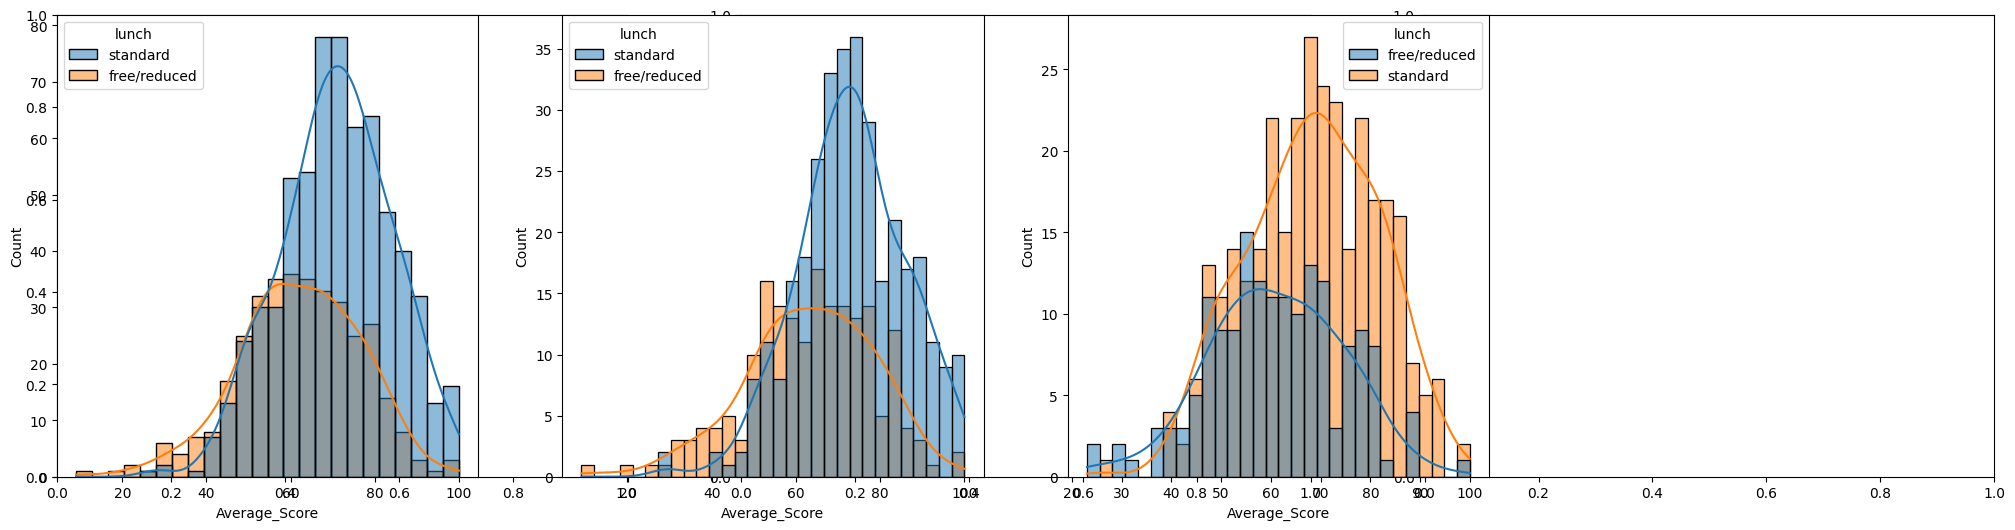

In [32]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x = 'Average_Score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x = 'Average_Score',bins = 30,kde = True,color = 'green',hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x = 'Average_Score',bins = 30,kde = True,color = 'red',hue = 'lunch')
plt.tight_layout()
plt.show()

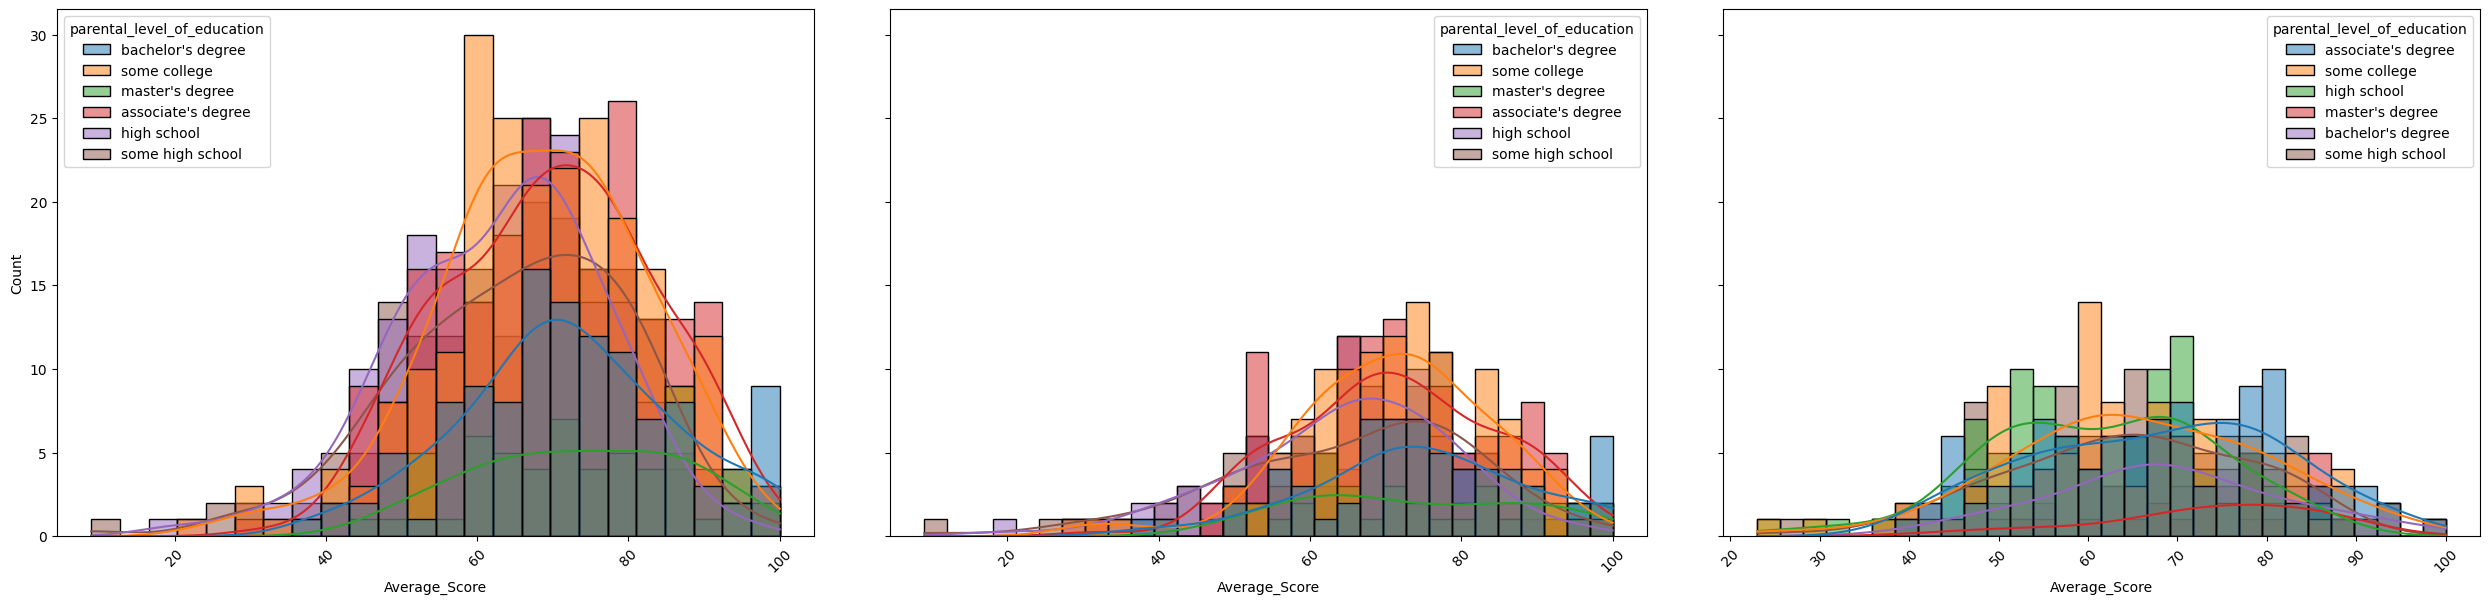

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6), sharey=True)
sns.histplot(data=df, x='Average_Score', kde=True, hue='parental_level_of_education', ax=axs[0])
sns.histplot(data=df[df.gender == 'female'], x='Average_Score', bins=30, kde=True,color='green', hue='parental_level_of_education', ax=axs[1])
sns.histplot(data=df[df.gender == 'male'], x='Average_Score', bins=30, kde=True, color='red', hue='parental_level_of_education', ax=axs[2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.1) 
for ax in axs:
    ax.tick_params(axis='x', rotation=45)
plt.show()


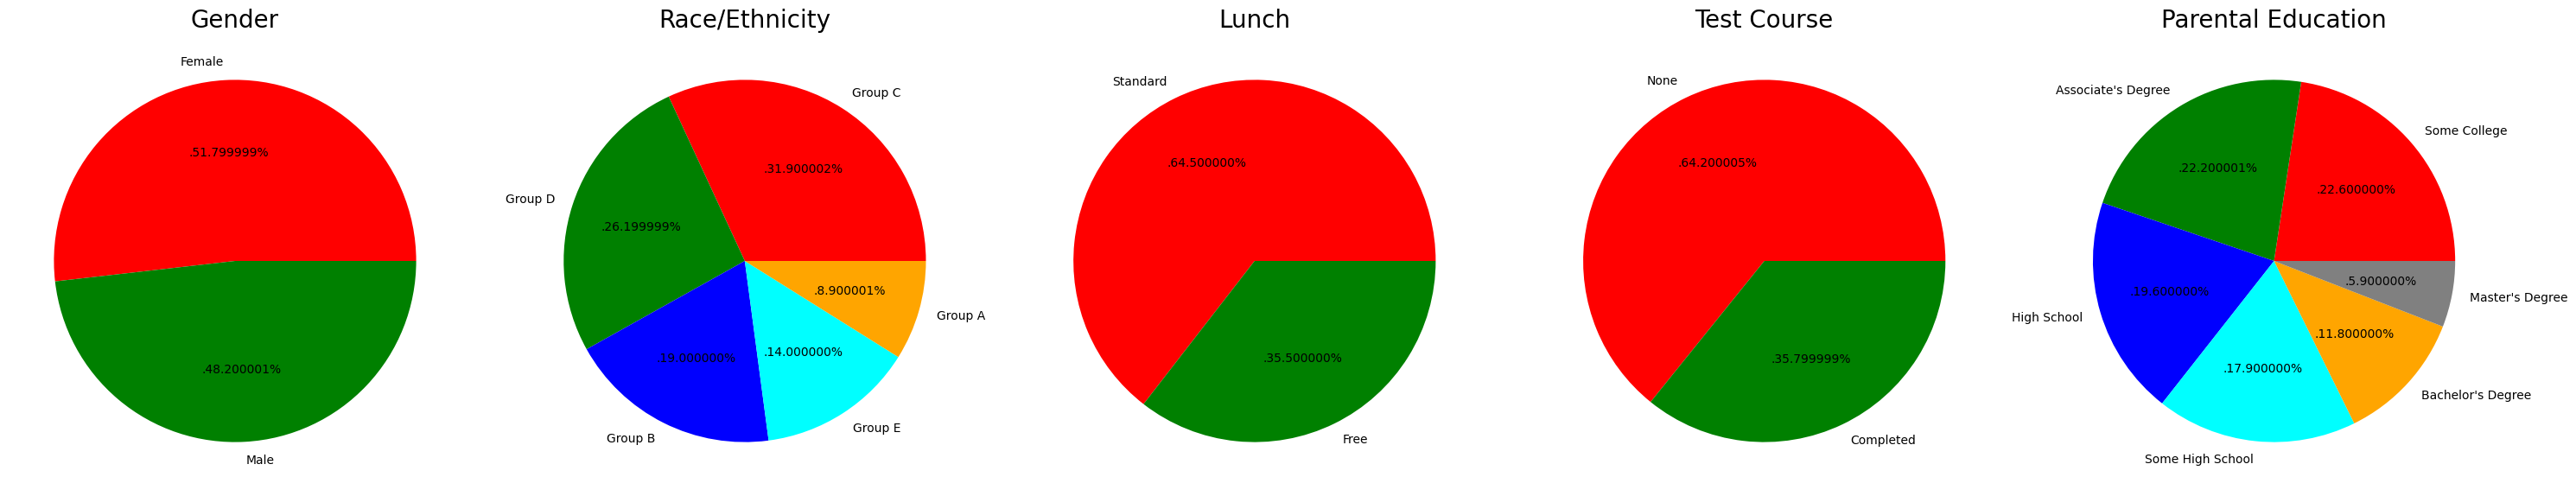

In [40]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

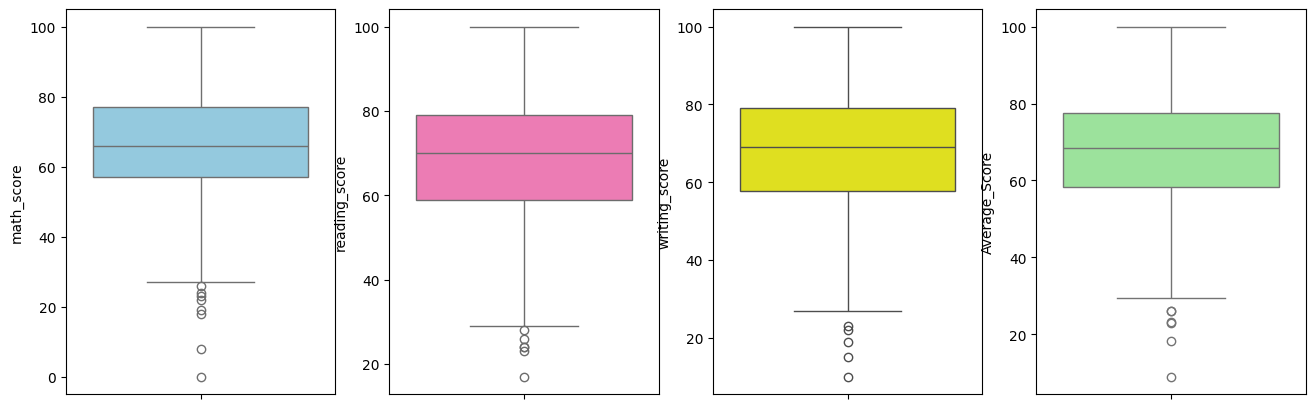

In [41]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_Score'],color='lightgreen')
plt.show()

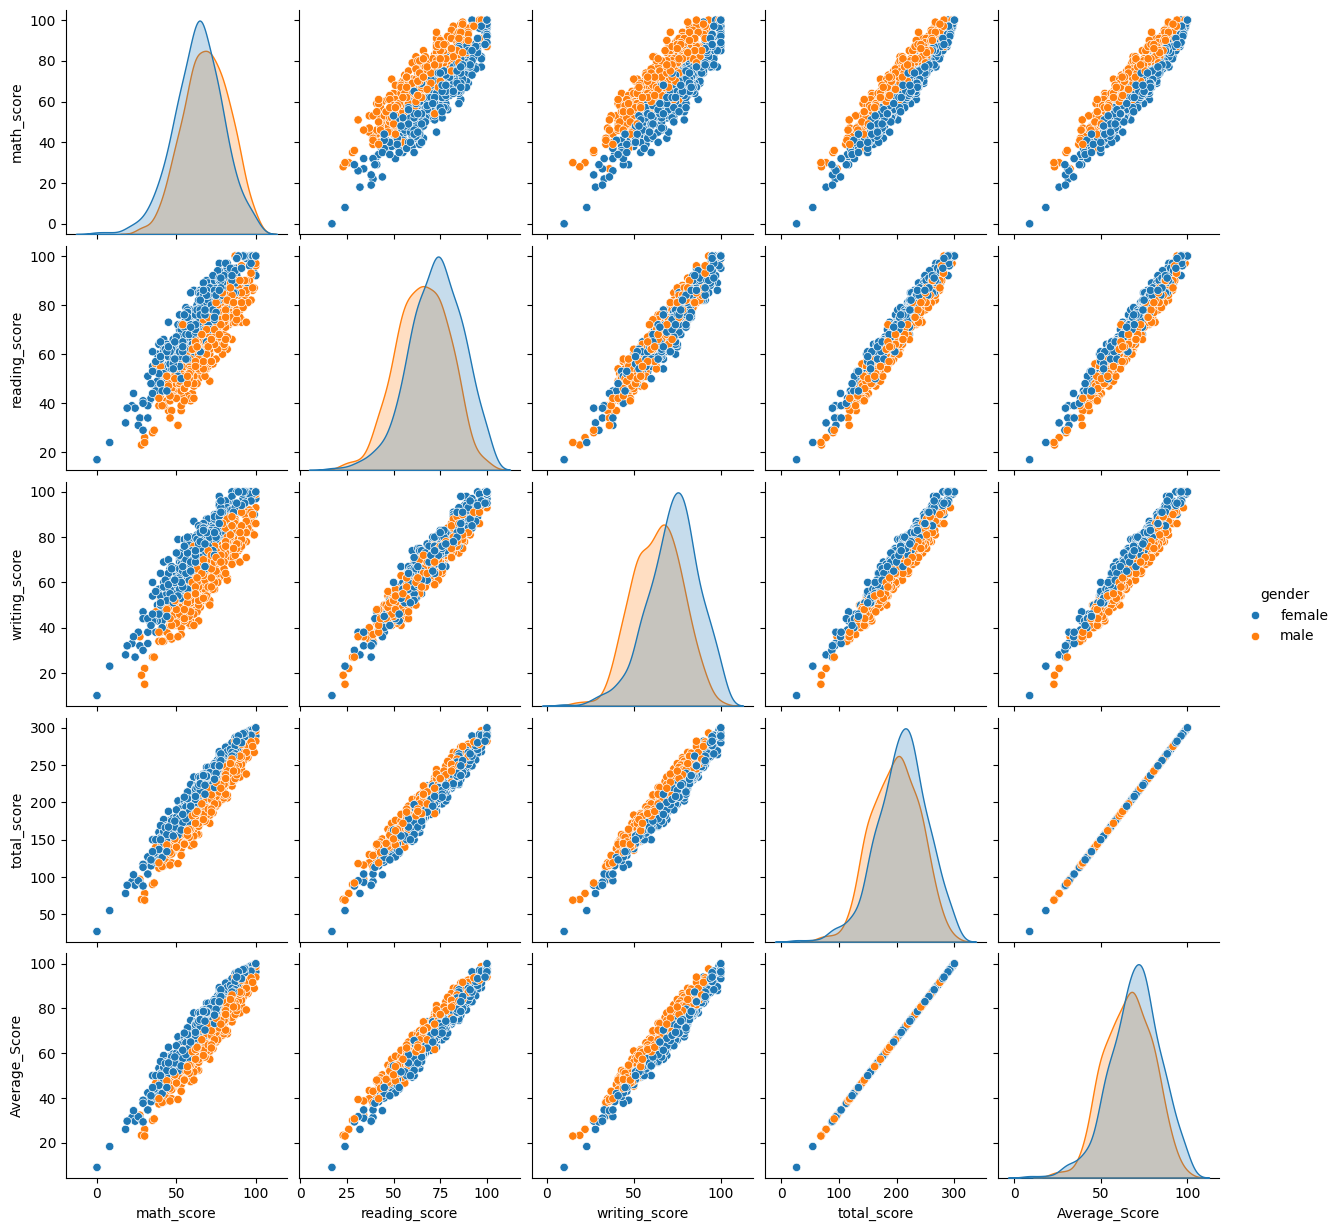

In [42]:
sns.pairplot(df,hue = 'gender')
plt.show()